In [14]:
import json
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
import os
os.getcwd()

'/Users/Daniele/Documents/Github/complexity72_25/notebooks'

Influencers

In [6]:
import json

#not for now! 
#with open('preprocessed_dataset/speeches.json', 'r', encoding='utf-8') as f:
#    data_sp = json.load(f)

#print(data_sp[0])
#print(data_sp[0].keys())
#print(len(data_sp))

#influencers_summary_cop26.csv, influencers_summary_covid, influencers_summary_ru_ukr

with open('../data/raw/influencers_summary_cop26.csv', 'r', encoding='utf-8') as f:
    data_influencers_cop26 = pd.read_csv(f)
    print(data_influencers_cop26.shape)
    print("all columns:", data_influencers_cop26.columns)

with open('../data/raw/influencers_summary_covid.csv', 'r', encoding='utf-8') as f:
    data_influencers_covid = pd.read_csv(f)
    print(data_influencers_covid.shape)
    print("all columns:", data_influencers_covid.columns)

with open('../data/raw/influencers_summary_ru_ukr.csv', 'r', encoding='utf-8') as f:
    data_influencers_ru_ukr = pd.read_csv(f)
    print(data_influencers_ru_ukr.shape)
    print("all columns:", data_influencers_ru_ukr.columns)


# SHARED COLUMNS ACROSS DATASETS!
shared_columns = set(data_influencers_cop26.columns) & set(data_influencers_covid.columns) & set(data_influencers_ru_ukr.columns)
print("shared columns:", len(shared_columns), shared_columns)

(561, 11)
all columns: Index(['id', 'username', 'individual_or_org', 'category', 'num_of_rt',
       'num_of_retweeters', 'V1', 'followers_count', 'following_count',
       'tweet_count', 'listed_count'],
      dtype='object')
(1577, 6)
all columns: Index(['username', 'id', 'individual_or_org', 'category', 'num_of_rt',
       'num_of_retweeters'],
      dtype='object')
(1166, 8)
all columns: Index(['id', 'username', 'individual_or_org', 'category', 'num_of_rt',
       'num_original_tweets', 'followers_count', 'num_of_retweeters'],
      dtype='object')
shared columns: 6 {'id', 'individual_or_org', 'num_of_rt', 'category', 'num_of_retweeters', 'username'}


In [7]:
print("unique categories in cop26:", data_influencers_cop26["category"].unique())
print("unique categories in covid:", data_influencers_covid["category"].unique())
print("unique categories in ru_ukr:", data_influencers_ru_ukr["category"].unique())

#unique su individuals in individual_or_org: 
print("unique individual_or_org in cop26:", data_influencers_cop26["individual_or_org"].unique())
print("unique individual_or_org in covid:", data_influencers_covid["individual_or_org"].unique())
print("unique individual_or_org in ru_ukr:", data_influencers_ru_ukr["individual_or_org"].unique())

unique categories in cop26: ['Activist' 'Media' 'Other' 'Private Individual'
 'International Organization / NGO' 'Politics']
unique categories in covid: ['Private Individual' 'Media' 'Politics' 'Activist' 'Other'
 'International Organization / NGO']
unique categories in ru_ukr: ['Other' 'Private Individual' 'Politics' 'Media' 'Activist'
 'International Organization / NGO']
unique individual_or_org in cop26: ['Individual' 'Organization']
unique individual_or_org in covid: ['Individual' 'Organization' nan]
unique individual_or_org in ru_ukr: ['Individual' 'Organization' nan]


In [8]:
#Number of users in each dataset
print("Number of users in influencers_summary_cop26:", data_influencers_cop26['username'].nunique())
print("Number of users in influencers_summary_covid:", data_influencers_covid['username'].nunique())
print("Number of users in influencers_summary_ru_ukr:", data_influencers_ru_ukr['username'].nunique()) 

#in each dataset we have unique lists of users; 
set_common_users = set(data_influencers_cop26['username']).intersection(set(data_influencers_covid['username'])).intersection(set(data_influencers_ru_ukr['username']))
print("Number of common users in all datasets:", len(set_common_users))

#Username level
set_common_users_cop26_covid = set(data_influencers_cop26['username']).intersection(set(data_influencers_covid['username']))
print("Number of common users in influencers_summary_cop26 and influencers_summary_covid:", len(set_common_users_cop26_covid))
set_common_users_cop26_ru_ukr = set(data_influencers_cop26['username']).intersection(set(data_influencers_ru_ukr['username']))
print("Number of common users in influencers_summary_cop26 and influencers_summary_ru_ukr:", len(set_common_users_cop26_ru_ukr))
set_common_users_covid_ru_ukr = set(data_influencers_covid['username']).intersection(set(data_influencers_ru_ukr['username']))
print("Number of common users in influencers_summary_covid and influencers_summary_ru_ukr:", len(set_common_users_covid_ru_ukr))




print("Number of ID users in influencers_summary_cop26:", data_influencers_cop26['id'].nunique())
print("Number of ID users in influencers_summary_covid:", data_influencers_covid['id'].nunique())
print("Number of ID users in influencers_summary_ru_ukr:", data_influencers_ru_ukr['id'].nunique()) 

#ID level
set_common_ID_users = set(data_influencers_cop26['id']).intersection(set(data_influencers_covid['id'])).intersection(set(data_influencers_ru_ukr['id']))
print("Number of common ID users in all datasets:", len(set_common_ID_users))
set_common_id_cop26_covid = set(data_influencers_cop26['id']).intersection(set(data_influencers_covid['id']))
print("Number of common users in influencers_summary_cop26 and influencers_summary_covid:", len(set_common_users_cop26_covid))
set_common_id_cop26_ru_ukr = set(data_influencers_cop26['id']).intersection(set(data_influencers_ru_ukr['id']))
print("Number of common users in influencers_summary_cop26 and influencers_summary_ru_ukr:", len(set_common_users_cop26_ru_ukr))
set_common_id_covid_ru_ukr = set(data_influencers_covid['id']).intersection(set(data_influencers_ru_ukr['id']))
print("Number of common users in influencers_summary_covid and influencers_summary_ru_ukr:", len(set_common_users_covid_ru_ukr))

#list of all different ID users 
set_all_unique_id_users = set(data_influencers_cop26['id']).union(set(data_influencers_covid['id'])).union(set(data_influencers_ru_ukr['id']))
print("Number of different ID users in all datasets:", len(set_all_unique_id_users))


Number of users in influencers_summary_cop26: 561
Number of users in influencers_summary_covid: 1577
Number of users in influencers_summary_ru_ukr: 1166
Number of common users in all datasets: 40
Number of common users in influencers_summary_cop26 and influencers_summary_covid: 89
Number of common users in influencers_summary_cop26 and influencers_summary_ru_ukr: 64
Number of common users in influencers_summary_covid and influencers_summary_ru_ukr: 172
Number of ID users in influencers_summary_cop26: 561
Number of ID users in influencers_summary_covid: 1577
Number of ID users in influencers_summary_ru_ukr: 1166
Number of common ID users in all datasets: 40
Number of common users in influencers_summary_cop26 and influencers_summary_covid: 89
Number of common users in influencers_summary_cop26 and influencers_summary_ru_ukr: 64
Number of common users in influencers_summary_covid and influencers_summary_ru_ukr: 172
Number of different ID users in all datasets: 3016


In [9]:
#how many individual or organizations in set_all_unique_id_users: column "individual_or_org" can be Individual or Organization

#for each user in set_common_ID_users, controllo Individual or Organization, Category: ['Activist' 'Media' 'Other' 'Private Individual', 'International Organization / NGO' 'Politics']

users_individual_or_org_and_category = {}
print(set_common_ID_users)

#check se gli id in set_common_ID_users hanno gli stessi valori in individual_or_org e category su tutti i dataset
#i valori sono o Individual o Organization per individual_or_org e 
id_mistmatch = []
for user_id in set_common_ID_users:
    individual_or_org_values = []
    category_values = []
    for df in [data_influencers_cop26, data_influencers_covid, data_influencers_ru_ukr]:
        individual_or_org = df.loc[df['id'] == user_id, 'individual_or_org'].values
        category = df.loc[df['id'] == user_id, 'category'].values
        individual_or_org_values.extend(individual_or_org)
        category_values.extend(category)
    if len(set(individual_or_org_values)) == 1 and len(set(category_values)) == 1:
        users_individual_or_org_and_category[user_id] = {
            "individual_or_org": individual_or_org_values[0],
            "category": category_values[0]
        }
    else:
        id_mistmatch.append(user_id)
        
print("Number of users with consistent individual_or_org and category across datasets:", len(users_individual_or_org_and_category))
print("Number of users with inconsistent individual_or_org or category across datasets:", len(id_mistmatch))
print("Users with inconsistent individual_or_org or category:", id_mistmatch)

#printo questi utenti con individual_or_org e category nei vari dataset
for user_id in id_mistmatch:
    print(f"User ID: {user_id}")
    for df in [data_influencers_cop26, data_influencers_covid, data_influencers_ru_ukr]:
        individual_or_org = df.loc[df['id'] == user_id, 'individual_or_org'].values
        category = df.loc[df['id'] == user_id, 'category'].values
        print(f" Individual or Org: {individual_or_org}, Category: {category}")


{811972460560019456, 846037320667217921, 14173315, 380648579, 15012486, 8973062, 14569869, 34713362, 16973333, 25067168, 2097571, 18856867, 15484198, 87818409, 4898091, 788524, 4970411, 807095, 16935292, 21866939, 1652541, 6433472, 15438913, 1115874631, 20973388, 28785486, 2467791, 759251, 2170986966, 355989081, 621533, 5988062, 91478624, 14260960, 6134882, 51241574, 36327407, 612473, 157981564, 742143}
Number of users with consistent individual_or_org and category across datasets: 36
Number of users with inconsistent individual_or_org or category across datasets: 4
Users with inconsistent individual_or_org or category: [18856867, 15484198, 16935292, 2170986966]
User ID: 18856867
 Individual or Org: ['Organization'], Category: ['Media']
 Individual or Org: ['Organization'], Category: ['Media']
 Individual or Org: ['Individual'], Category: ['Other']
User ID: 15484198
 Individual or Org: ['Individual'], Category: ['Private Individual']
 Individual or Org: ['Individual'], Category: ['Poli

In [11]:
#se ci sono questi utenti rimuovo dai dataframe data_influencers_cop26, data_influencers_covid, data_influencers_ru_ukr
data_influencers_cop26 = data_influencers_cop26[~data_influencers_cop26['id'].isin(id_mistmatch)]
print("Number of users in influencers_summary_cop26 after removing mismatches:", data_influencers_cop26['id'].nunique())
data_influencers_covid = data_influencers_covid[~data_influencers_covid['id'].isin(id_mistmatch)]
print("Number of users in influencers_summary_covid after removing mismatches:", data_influencers_covid['id'].nunique())
data_influencers_ru_ukr = data_influencers_ru_ukr[~data_influencers_ru_ukr['id'].isin(id_mistmatch)]    
print("Number of users in influencers_summary_ru_ukr after removing mismatches:", data_influencers_ru_ukr['id'].nunique())

set_common_ID_users = set(data_influencers_cop26['id']).intersection(set(data_influencers_covid['id'])).intersection(set(data_influencers_ru_ukr['id']))
print("Number of common ID users in all datasets after removing mismatches:", len(set_common_ID_users)) # OK 

Number of users in influencers_summary_cop26 after removing mismatches: 557
Number of users in influencers_summary_covid after removing mismatches: 1573
Number of users in influencers_summary_ru_ukr after removing mismatches: 1162
Number of common ID users in all datasets after removing mismatches: 36


In [12]:
#calcolo numero di utenti individuali e organizzazioni in set_all_unique_id_users
individual_count = 0
organization_count = 0
nan_count = 0
Diz_individual_or_org = {}
for user_id in set_all_unique_id_users:  #cerco id in data_influencers_cop26, data_influencers_covid, data_influencers_ru_ukr, appena lo trovo stop
    for df in [data_influencers_cop26, data_influencers_covid, data_influencers_ru_ukr]:
        individual_or_org = df.loc[df['id'] == user_id, 'individual_or_org'].values
        if individual_or_org:
            Diz_individual_or_org[user_id] = individual_or_org[0]
            if individual_or_org[0] == 'Individual':
                individual_count += 1
            elif individual_or_org[0] == 'Organization':
                organization_count += 1
            elif pd.isna(individual_or_org[0]):
                nan_count += 1
            break

print("Number of individual users in all datasets:", individual_count)
print("Number of organization users in all datasets:", organization_count)
print("Number of users with NaN individual_or_org in all datasets:", nan_count)
print("Sum of individual and organization users:", individual_count + organization_count + nan_count) # OK 

/var/folders/43/tx67zsg90pg77hblfmmfv_tm0000gn/T/ipykernel_3596/988932964.py:9: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if individual_or_org:


Number of individual users in all datasets: 1975
Number of organization users in all datasets: 1002
Number of users with NaN individual_or_org in all datasets: 35
Sum of individual and organization users: 3012


In [13]:
#per gli utenti in comumne, da Diz_individual_or_org calcolo il numero di utenti individuali e organizzazioni
individual_count_common = 0
organization_count_common = 0
nan_count_common = 0
for user_id in set_common_ID_users:
    if user_id in Diz_individual_or_org:
        if Diz_individual_or_org[user_id] == 'Individual':
            individual_count_common += 1
        elif Diz_individual_or_org[user_id] == 'Organization':
            organization_count_common += 1
        elif pd.isna(Diz_individual_or_org[user_id]):
            nan_count_common += 1
print("Number of individual users in common datasets:", individual_count_common)
print("Number of organization users in common datasets:", organization_count_common)
print("Number of users with NaN individual_or_org in common datasets:", nan_count_common)

Number of individual users in common datasets: 1
Number of organization users in common datasets: 35
Number of users with NaN individual_or_org in common datasets: 0


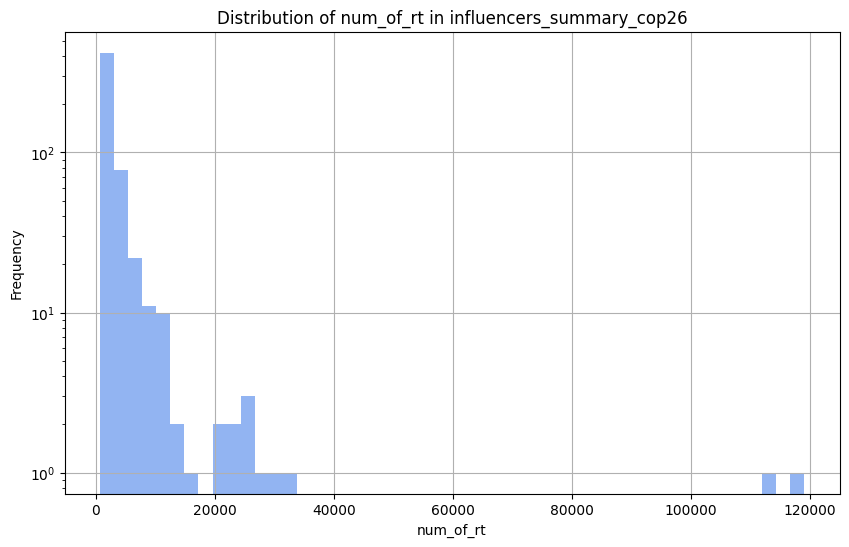

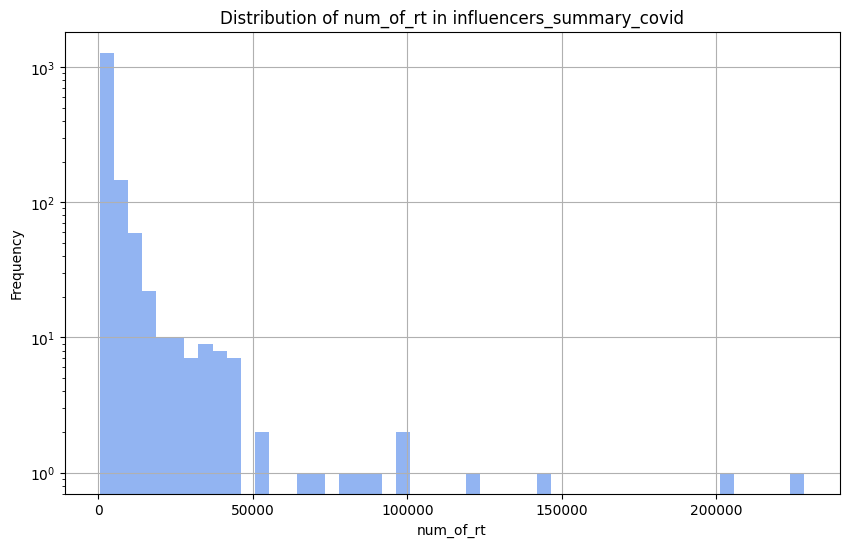

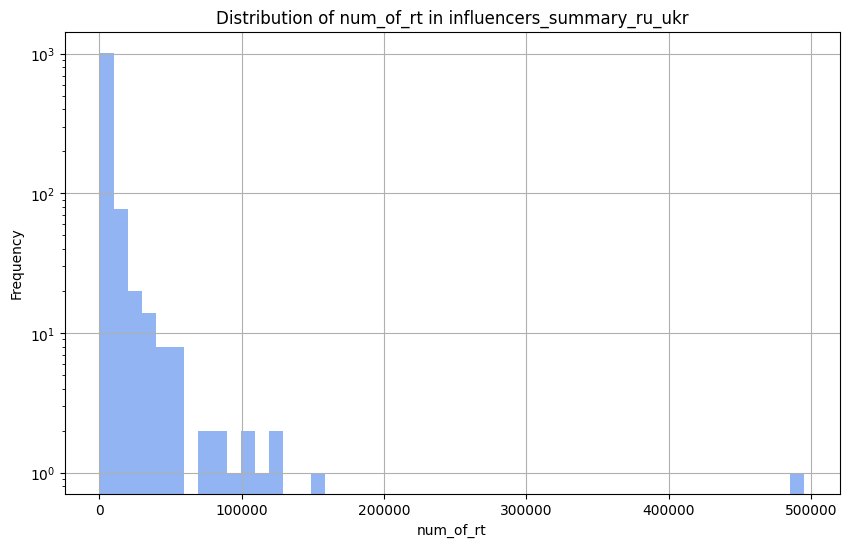

In [17]:
#calcolo distibuzione num_of_rt (numero dei rt), e num_of_retweeters (unique dei suoi retweet) 
#per ogni dataset plotto distribuzione di num_of_rt e num_of_retweeters

def plot_distribution(df, column, title):
    plt.figure(figsize=(10, 6))
    df[column].hist(bins=50, color='cornflowerblue', alpha=0.7)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.yscale('log')  # Use logarithmic scale for better visibility of distribution
    #plt.grid(axis='y', alpha=0.75)
    plt.show()

plot_distribution(data_influencers_cop26, 'num_of_rt', 'Distribution of num_of_rt in influencers_summary_cop26')
plot_distribution(data_influencers_covid, 'num_of_rt', 'Distribution of num_of_rt in influencers_summary_covid')
plot_distribution(data_influencers_ru_ukr, 'num_of_rt', 'Distribution of num_of_rt in influencers_summary_ru_ukr')

Tweets